# Coin Flips

## Overview

In this section we explore some of Python's utilities in order to simulate coin flips.

## Coin flips

The easiest way to simulate coin flips is ```numpy.random.randint``` as shown below

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [12]:
# set the seed for the random engine
# so that experiments can be reproduced
np.random.seed(0)

# generate an integer in [0, 1]
coin_flip = np.random.randint(0,2)

print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


Let's create  a utility function that will help us get the frequency of
either heads or tails in a series of coin flips

In [22]:
def get_coin_flip_event_frquency(num_flips: int, event: int=1) -> float:
    flips = [np.random.randint(0, 2) for _ in range(num_flips)]
    total_events = len([e for e in flips if e == event])
    return total_events / len(flips)

In [23]:
n_coin_flips = 10
print(f"Frequency of heads in {n_coin_flips} coin flips is {get_coin_flip_event_frquency(n_coin_flips, event=1)}")

Frequency of heads in 10 coin flips is 0.4


Let's see what happens is we flip the coin 1500 times. We will collect
the computed frequencies and plot these

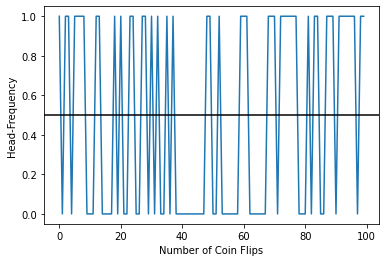

In [24]:

frequencies = []
for _ in range(100):
    frequencies.append(get_coin_flip_event_frquency(num_flips=1, event=1))
 
plt.plot(list(range(100)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

## Simulating a biased coin

Let's now turn attention into simulating a coin that falls on heads say $80\%$ of the time.
We will use ```numpy.random.binomial``` method for this.

In [25]:
n_coin_flips = 1000
head_count = np.random.binomial(n_coin_flips, p=0.8)
print(f"Frequency of Heads is {head_count / n_coin_flips}")

Frequency of Heads is 0.822


Notice that this is not exacly 0.8 as we would have hoped. Let's repeat the experiment 10 
times and examine the output

In [27]:
for i in range (1, 11):
    head_count = np.random.binomial(n_coin_flips, p=0.8)
    frequency = head_count / n_coin_flips
    print(f"At experiment {i} frequency of Heads is {frequency}")

At experiment 1 frequency of Heads is 0.799
At experiment 2 frequency of Heads is 0.817
At experiment 3 frequency of Heads is 0.808
At experiment 4 frequency of Heads is 0.796
At experiment 5 frequency of Heads is 0.775
At experiment 6 frequency of Heads is 0.817
At experiment 7 frequency of Heads is 0.766
At experiment 8 frequency of Heads is 0.806
At experiment 9 frequency of Heads is 0.797
At experiment 10 frequency of Heads is 0.806


As we can see the frequency fluctuates around 0.8. Let's try to establish a 
confidence interval
about this fluctuation. First we need to collect the observations

In [30]:
head_count_data = np.random.binomial(n_coin_flips, p=0.8, size=1000)
frequency_array = head_count_data / n_coin_flips


# compute min/max frequencies
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency: {min_freq}")
print(f"Maximum frequency: {max_freq}")
print(f"Frequency range: {max_freq - min_freq}")


Minimum frequency: 0.761
Maximum frequency: 0.842
Frequency range: 0.08099999999999996


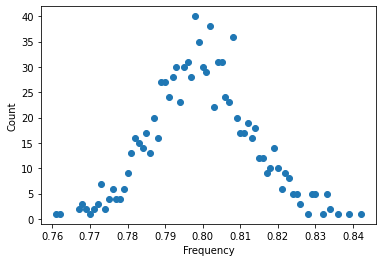

In [33]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1
 
frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

## Tossing four coins

Let's assume we have four coins. We want to calculate the probability of getting 
four heads when tossing these four coins. The answer to this question is straightforward if we assume that the coins are fair. 

$$P(\text{all heads}) = \frac{1}{2}\frac{1}{2}\frac{1}{2}\frac{1}{2} = 0.0625$$

Let's use Python to simulate this.

In [1]:
import numpy as np


In [2]:
n_coins = 4

Compute the probability for one trial

In [5]:
np.random.seed(42)

n_heads = 0

nums = np.random.random(size=n_coins)
n_heads = sum(nums > 0.5)


    
print(f"Probability of heads is {n_heads / n_coins}")

Probability of heads is 0.75


In [6]:
n_trials = 10000

all_heads = 0

for itr in range(n_trials):
    
    nums = np.random.random(size=n_coins)
    n_heads = sum(nums > 0.5)
    
    if n_heads == 4:
        all_heads += 1
        
print(f"Probability of heads is {all_heads / n_trials}")       
    

Probability of heads is 0.0625


## Summary

## References